ROC Threshold Implementation

[*********************100%***********************]  1 of 1 completed


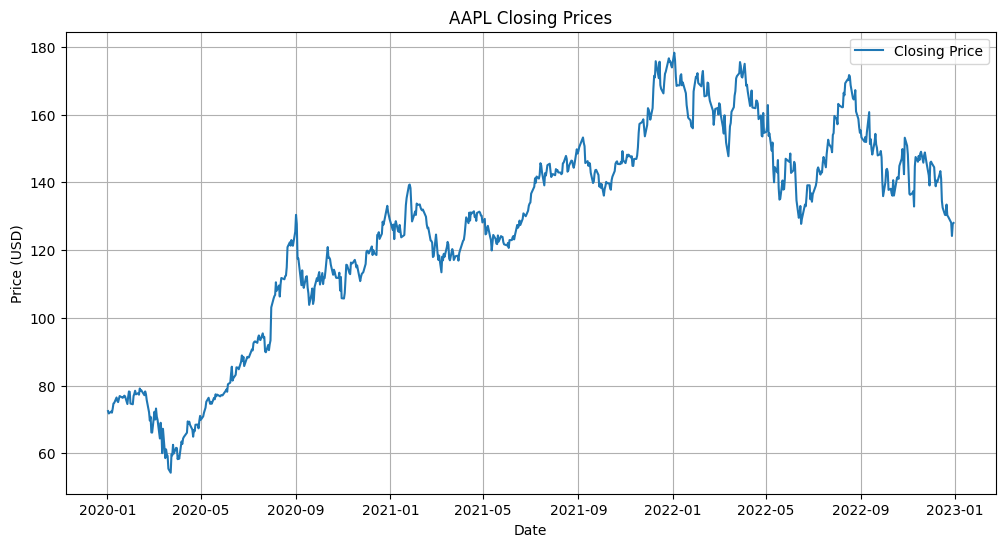

Price            Close        High         Low        Open     Volume  Signal  \
Date                                                                            
2020-01-03   71.763718   72.523746   71.539330   71.696160  146322800       0   
2020-01-06   72.335548   72.374154   70.634532   70.885464  118387200       0   
2020-01-07   71.995361   72.600968   71.775796   72.345212  108872000       0   
2020-01-08   73.153519   73.455118   71.698604   71.698604  132079200       0   
2020-01-09   74.707321   74.900342   73.879735   74.130660  170108400       0   
...                ...         ...         ...         ...        ...     ...   
2022-12-23  129.900284  130.451959  127.713276  128.974252   63814900       0   
2022-12-27  128.097504  129.456999  126.806975  129.427446   69007800       0   
2022-12-28  124.166786  129.082622  123.999315  127.742834   85438400       0   
2022-12-29  127.683746  128.540812  125.831689  126.087820   75703700       0   
2022-12-30  127.998978  128.

In [ ]:
import numpy as np
import pandas as pd 

%run loading-price-data.ipynb
%run backtesting-framework.ipynb

def roc_threshold_momentum_strategy(data, roc_n = 10, threshold = 0.03):
    data = data.copy()
    momentum = data['Close'].pct_change(periods = roc_n)
    signal = np.where(momentum>threshold, 1, 0)
    return pd.DataFrame({'ROC_signal': signal}, index = data.index)

if not globals().get('QUIET', False):
    signal_roc = roc_threshold_momentum_strategy(data, roc_n = 10, threshold = 0.03)
    results_roc = backtest_framework(data, signal_roc)
    print(results_roc)